# World Ocean Atlas

In [20]:
import odp

In [43]:
gd=odp.GridData()

See available datasets

In [44]:
gd.datasets

,container,folder,x,y,depth,time
name,,,,,,
KAUST Waves,kaust-zarr,zarr/WAVES/,latitude,longitude,depth,time
KAUST Ocean,kaust-zarr,zarr/Ocean/,latitude,longitude,depth,time
MET,met,zarr/,lat,lon,depth,time
World Ocean Atlas Silicate,woa,zarr/woa18_all_i13_01.zarr,lat,lon,depth,
World Ocean Atlas Temperature,woa,zarr/woa18_decav81B0_%_04.zarr,lat,lon,depth,
World Ocean Atlas Salinity,woa,zarr/woa18_decav81B0_s13_04.zarr,lat,lon,depth,
World Ocean Atlas Phosphate,woa,zarr/woa18_all_p13_01.zarr,lat,lon,depth,
World Ocean Atlas Oxygen,woa,zarr/woa18_all_o13_01.zarr,lat,lon,depth,
World Ocean Atlas Nitrate,woa,zarr/woa18_all_n13_01.zarr,lat,lon,depth,


Open the World Ocean Atlas dataset

In [ ]:
woa=gd.open_dataset('World Ocean Atlas Temperature')
woa

Select a specific depth and area

In [39]:
ds_slice=woa.sel(depth=10,lon=slice(-90,90)) 
ds_slice

<xarray.Dataset>
Dimensions:             (time: 1, nbounds: 2, lat: 720, lon: 720)
Coordinates:
    depth               float32 10.0
  * lat                 (lat) float32 -89.88 -89.62 -89.38 ... 89.38 89.62 89.88
  * lon                 (lon) float32 -89.88 -89.62 -89.38 ... 89.38 89.62 89.88
  * time                (time) datetime64[ns] 1981-01-01
Dimensions without coordinates: nbounds
Data variables: (12/13)
    climatology_bounds  (time, nbounds) float32 dask.array<chunksize=(1, 2), meta=np.ndarray>
    crs                 int32 ...
    depth_bnds          (nbounds) float32 dask.array<chunksize=(2,), meta=np.ndarray>
    lat_bnds            (lat, nbounds) float32 dask.array<chunksize=(720, 2), meta=np.ndarray>
    lon_bnds            (lon, nbounds) float32 dask.array<chunksize=(720, 2), meta=np.ndarray>
    t_an                (time, lat, lon) float32 dask.array<chunksize=(1, 90, 360), meta=np.ndarray>
    ...                  ...
    t_gp                (time, lat, lon) float64 dask.array<chunksize=(1, 90, 360), meta=np.ndarray>
    t_ma                (time, lat, lon) float32 dask.array<chunksize=(1, 90, 360), meta=np.ndarray>
    t_mn                (time, lat, lon) float32 dask.array<chunksize=(1, 90, 360), meta=np.ndarray>
    t_oa                (time, lat, lon) float32 dask.array<chunksize=(1, 90, 360), meta=np.ndarray>
    t_sd                (time, lat, lon) float32 dask.array<chunksize=(1, 90, 360), meta=np.ndarray>
    t_se                (time, lat, lon) float32 dask.array<chunksize=(1, 90, 360), meta=np.ndarray>
Attributes: (12/49)
    Conventions:                     CF-1.6, ACDD-1.3
    cdm_data_type:                   Grid
    comment:                         global climatology as part of the World ...
    contributor_name:                Ocean Climate Laboratory
    contributor_role:                Calculation of climatologies
    creator_email:                   NCEI.info@noaa.gov
    ...                              ...
    summary:                         Climatological mean temperature for the ...
    time_coverage_duration:          P30Y
    time_coverage_end:               2010-01-31
    time_coverage_resolution:        P03M
    time_coverage_start:             1981-01-01
    title:                           World Ocean Atlas 2018 : sea_water_tempe...

Plot temperatue, t_an

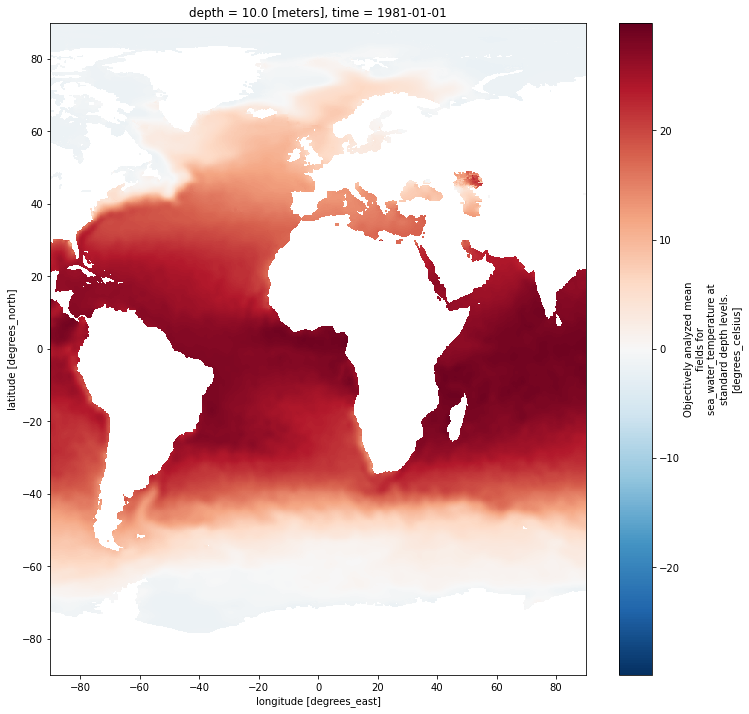

In [40]:
ds_slice.t_an.plot(figsize=(12,12))

Compute minimum temperature in slice

In [41]:
ds_slice.t_an.min().compute()

<xarray.DataArray 't_an' ()>
array(-1.9244, dtype=float32)
Coordinates:
    depth    float32 10.0

Plot temperature profile at a specific location

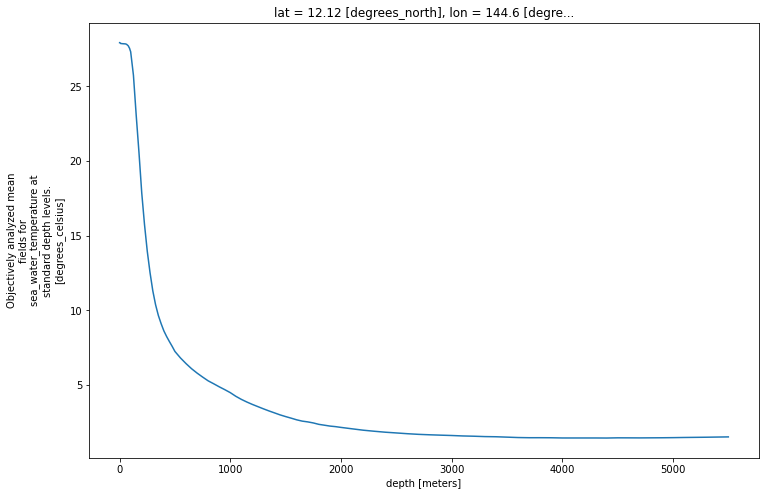

In [42]:
woa.t_an.sel(lon=144.60973445, lat=12.05192707,method='nearest').plot(figsize=(12,8))